# 2. AS-AD Model :

In [ ]:
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

In [25]:
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]')

**Question 1**

In [26]:
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

In [27]:
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

In [28]:
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

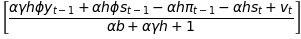

In [29]:
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y

In [30]:
eq_pi= SRAS_pit.subs(yt,eq_y)
eq_pi

In [31]:
eq_pi= SRAS_pit.subs(yt,eq_y)
#eq_pii= sm.solve(sm.Eq(eq_pi,pit),pit)
#eq_pii

**Question 2**

We want to find the output and inflation for the equilibrium and see the evolution when there is a demand disturbance.
To do that we will create a dictonnary for the parameters of this question, and create two functions for the output and inflation from the equation find previously. We will use these functions to get the output and inflation level at the equilibrium and after a shock and plot the results.

First of all we create a dictionary to enter the value of our parameters ($\alpha$, $h$, $b$, $\phi$, $\gamma$) :

In [32]:
#initialization of the dicitonary
pms = {}

#enter the parameters and their value
pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075

From the equation of the output find in the question one ( "eq_y" ), we create a function by using the lambdify.

In [33]:
#Our eq_y is a list, therefore we need to consider only the first element of it to use the lambdify function.
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])

#define the function
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    """
    This function take five parameters plus five others which are by default define in the dictionary called "pms" and
    return the output of the economy.
    
        args :  vt (float) : the demand disturbance in period t
                st (float) : the supply disturbance in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The output yt of the economy for the period t.
    
    """
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)

Now let's enter values of the variables at the equilibrium, which means $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ :

In [34]:
equili_output(0,0,0,0,0)

The output is zero ($y_t = 0$) which makes sense given that all the other variables are equal to 0.

Now let's what would be the impact of a positive demand disturbance on the production. For that let's just set $v_t = 0.1$ instead of 0 :

In [35]:
equili_output(0.1,0,0,0,0)

When there is a positive disturbance of the demand $v_t$ we can observe an increase in the output. Indeed an increase in demande will stimulate the economy, the supply will adapt to the demand, increase as well, leading to more production.

Now let's see the impact of the demand disturbance on the **inflation** :

As before we use the inflation equation find in question one ( "eq_pi" ) to create a function.

In [39]:
#use lambdify on the inflation equation eq_pi
equil_pi= sm.lambdify((st, yt, pit_m1, st_m1, yt_m1, gamma, phi),eq_pi)

#define the function
def equili_pi (st, yt, pit_m1, st_m1, yt_m1, gamma=pms['gamma'], phi=pms['phi']):
    """
    This function take five parameters plus two others which are by default define in the dictionary called "pms" and
    return the inflation of the economy.
    
        args :  st (float) : the supply disturbance in period t
                yt (float) : the output in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The inflation pit of the economy for period t.
    
    """
    return equil_pi (st, yt, pit_m1, st_m1, yt_m1, gamma, phi)

In [37]:
equili_pi(0,0,0,0,0)

At the equilibrium, when $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ the inflation is zero ($\pi_t = 0$). 
Regarding the demand disturbance, it is not involve in the inflation equation, however its impact increased the output in period t. This increase in output will impact the inflation : 

In [38]:
equili_pi(0,0.0244140625,0,0,0)

The positive disturbance on the demand also increase the inflation.
We can summarize the effect of this disturbance as follow:
   1. The positive choc on $v_t$ leads to a higher demand
   2. The supply and the demand adjust on a higher production and therefor a higher output $y_t$
   3. Finally a higher output lead to inflation, an increase in $\pi_t$

**Question 3**

In [88]:
pms["delta"] = 0.80
pms["omega"] = 0.15
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")


In [89]:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

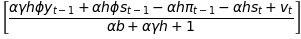

In [90]:
eq_y

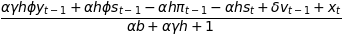

In [91]:
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

In [92]:
eq_pi

In [93]:
eq_pi_ar = eq_pi.subs(st,st_ar)
eq_pi_ar

In [103]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [106]:
equili_pi_ar(0,0,0,0,0)

In [ ]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)